<a href="https://colab.research.google.com/github/x1001000/ML-DL-UL-RL/blob/master/neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data

---



##匯入numpy，用於陣列運算
##匯入matplotlib.pyplot，用於資料視覺化

In [0]:
import numpy as np
import matplotlib.pyplot as plt

##串列的元素可以不同類別
##陣列的元素必須相同類別，儲存在記憶體的一段連續位址上

In [2]:
a = [ [4,5,6], [7,8,9] ]
print(type(a))
print(len(a))

<class 'list'>
2


##查看陣列的形狀及維度
陣列 aka 張量  
矩陣 aka 二維張量  
向量 aka 一維張量

In [3]:
a = np.array( [a,a,a,a,a] )
print(type(a))
print(len(a))
print(a.shape)
print(a.ndim)

<class 'numpy.ndarray'>
5
(5, 2, 3)
3


##用五筆有標記的資料來訓練一個神經元，意即
##用五組x(feature)和y(label)來最佳化w(weight)和b(bias)，使得線性函數y=wx+b最接近這五個資料點

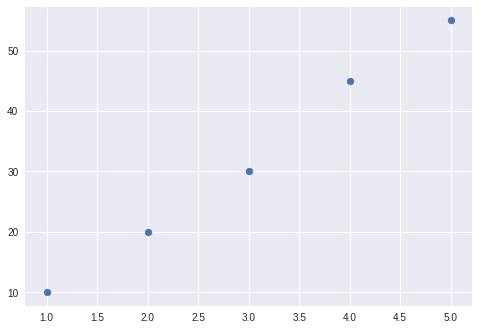

In [4]:
x = np.array( [1,2,3,4,5]      )
y = np.array( [10,20,30,45,55] )
plt.scatter(x,y)

#Model


---



##初學者用高階的keras庫(之後再用tensorflow)
##初學者用順序風格建模(之後再用函數風格)

In [5]:
from keras.models import Sequential
model = Sequential()

Using TensorFlow backend.


##y為一維的向量，故只需一個Dense(全連接)層的神經元
##x為一維的向量，故input_dim=1
##讓y直接等於f(x)，故激活函數用linear，即 y = activation( f(x) ) = f(x)

In [0]:
from keras.layers import Dense
model.add(Dense(1, input_dim=1, activation='linear'))

##誤差函數Loss(w,b)是算MSE(均方誤差)
##最佳化w和b的方法是SGD(隨機梯度下降)

In [0]:
from keras.optimizers import adam
model.compile(loss='MSE',
              optimizer='SGD')

##列出神經網路架構，這個例子只有一層一個神經元，只訓練到w,b兩個參數

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


##開始訓練，先訓練十個回合看看

In [9]:
model.fit(x, y, epochs=10)

Epoch 1/10
5/5 [==============================] - 1s 159ms/step - loss: 937.3405
Epoch 2/10
5/5 [==============================] - 0s 2ms/step - loss: 548.6326
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 322.1009
Epoch 4/10
5/5 [==============================] - 0s 571us/step - loss: 190.0776
Epoch 5/10
5/5 [==============================] - 0s 686us/step - loss: 113.1291
Epoch 6/10
5/5 [==============================] - 0s 601us/step - loss: 68.2756
Epoch 7/10
5/5 [==============================] - 0s 636us/step - loss: 42.1256
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 26.8751
Epoch 9/10
5/5 [==============================] - 0s 845us/step - loss: 17.9764
Epoch 10/10
5/5 [==============================] - 0s 1ms/step - loss: 12.7793


##用訓練過的模型/網路做預測，輸入訓練的feature，輸出結果應該很接近但不會剛好等於label

In [10]:
model.predict(x)

array([[11.668959],
       [21.29063 ],
       [30.912302],
       [40.533974],
       [50.155647]], dtype=float32)

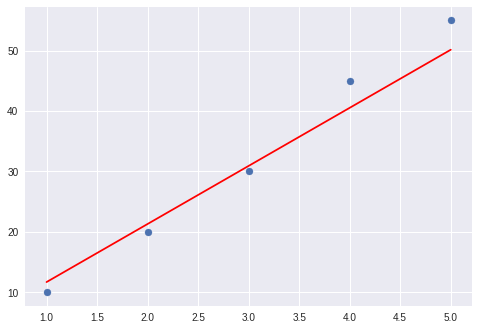

In [11]:
plt.scatter(x, y)
plt.plot(x, model.predict(x), color='red')